In [7]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import jaccard_score
import random
import matplotlib.pyplot as plt


# Generate random data with 3 clusters
n_samples = 300
n_features = 2
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

In [8]:
# Step 1: Initialize cluster means randomly as one of the data points
random.seed(0)
initial_indices = random.sample(range(n_samples), n_clusters)
cluster_means = X[initial_indices]
# Number of iterations
n_iterations = 10

In [10]:
# Step 2: Perform K-means clustering for 10 iterations
for iteration in range(n_iterations):
    # Step 2.1: Assign each point to the nearest cluster
    distances = np.linalg.norm(X[:, np.newaxis] - cluster_means, axis=2)
    assigned_clusters = np.argmin(distances, axis=1)
    
    # Step 2.2: Update cluster means
    for i in range(n_clusters):
        cluster_points = X[assigned_clusters == i]
        if len(cluster_points) > 0:
            cluster_means[i] = np.mean(cluster_points, axis=0)

In [11]:
# Step 3: Print final cluster means
print("Final Cluster Means:")
print(cluster_means)

Final Cluster Means:
[[ 4.74710337  2.01059427]
 [-6.88387179 -6.98398415]
 [-2.63323268  9.04356978]]


In [12]:
# Step 4: Compute Jaccard distance with ground truth clusters for each of the three clusters
jaccard_distances = []
for i in range(n_clusters):
    true_cluster = y == i
    predicted_cluster = assigned_clusters == i
    jaccard_distance = 1.0 - jaccard_score(true_cluster, predicted_cluster)
    jaccard_distances.append(jaccard_distance)

# Step 5: Print Jaccard distances
print("Jaccard Distances for Each Cluster:")
for i, distance in enumerate(jaccard_distances):
    print(f"Cluster {i}: {distance:.2f}")

Jaccard Distances for Each Cluster:
Cluster 0: 1.00
Cluster 1: 1.00
Cluster 2: 1.00


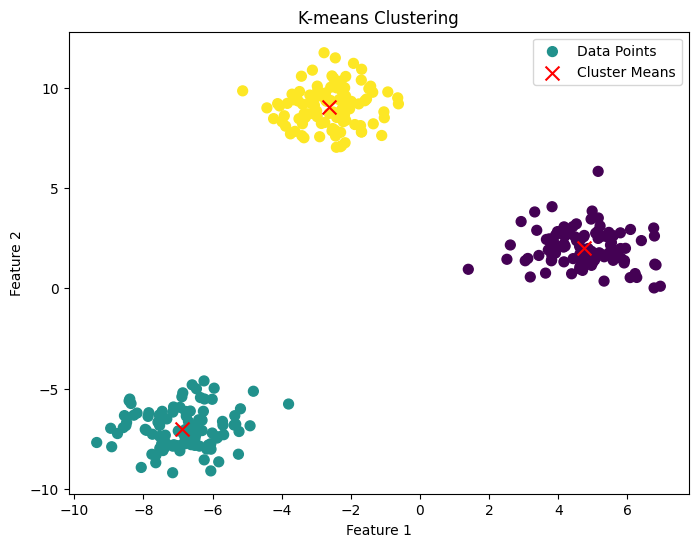

In [13]:
# Plot the data points and final cluster means
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=assigned_clusters, cmap='viridis', s=50, label='Data Points')
plt.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', marker='x', s=100, label='Cluster Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()